In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat_paths = ['/Volumes/dudmanlab/junchol/js2p0/WR37_022619/Matfiles',
    '/Volumes/dudmanlab/junchol/js2p0/WR38_052119/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR38_052219/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR38_052319/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR38_052419/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR39_100219/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR40_081919/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR40_082019/Matfiles', 
    '/Volumes/dudmanlab/junchol/js2p0/WR44_031020/Matfiles']

In [3]:
# Load classifier results
rez_collect = {}

for i in range(len(dat_paths)): 
    with open(os.path.join(dat_paths[i], 'classifier_output', 'trial_classifier_result_pre.pickle'), 'rb') as handle:
        rez, _ = pickle.load(handle)
    rez_collect[dat_paths[i][33:44]] = rez

In [4]:
# Create 'df_med' to collect all median-valued results
column_names = rez_collect['WR38_052119'].keys()
df_med = pd.DataFrame(columns=column_names)
df_med.insert(loc=0, column='id', value=rez_collect.keys())
df_med.set_index('id', inplace=True)

In [5]:
for i in rez_collect.keys(): 
    for key in rez_collect[i].keys(): 
        df_med.loc[i, key] = np.around(rez_collect[i][key]['med']['accuracy']['recall'], decimals=4)

value_vars_list = list(df_med.columns)        
df_med.reset_index(inplace=True)
df_med_melt = pd.melt(df_med, id_vars=['id'], value_vars=value_vars_list)  # to a long-format (more compatible with seaborn)

In [6]:
def select_relevant_rows(df_long, row_idx):
    df_select = df_long.loc[row_idx, :]
    df = df_select.dropna(axis=0)
    df.insert(df.shape[1], "val_float64", df["value"].astype('float64'))
    df_out = df.drop("value", axis=1)
    return df_out

### Classification of the four different blocks

In [7]:
# Result with resampling to match the number of neurons
rs_block_idx = ['_rs_block' in row for row in df_med_melt.variable]  # resample block index
df_med_rs_block = select_relevant_rows(df_med_melt, rs_block_idx)

In [8]:
# Result using all neurons
block_idx = [('_block' in row) and ('rs' not in row) for row in df_med_melt.variable]  # resample block index
df_med_block = select_relevant_rows(df_med_melt, block_idx)

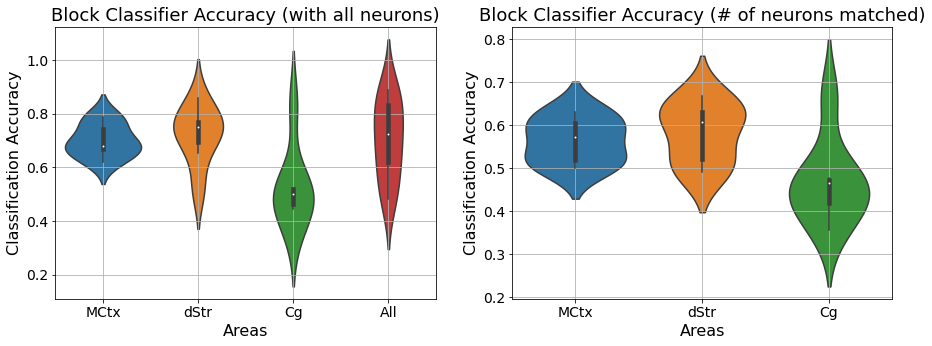

In [17]:
title_font = 18
axis_font = 16
tick_font = 14
# plt.rcParams['svg.fonttype'] = 'none'

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0] = sns.violinplot(x="variable", y="val_float64", data=df_med_block, ax=axes[0])
axes[0].set_title("Block Classifier Accuracy (with all neurons)", fontdict={'fontsize': title_font})
axes[0].set_xlabel("Areas", fontdict={'fontsize': axis_font})
axes[0].set_ylabel("Classification Accuracy", fontdict={'fontsize': axis_font})
axes[0].set_xticklabels(['MCtx', 'dStr', 'Cg', 'All'])
axes[0].tick_params(axis='both', which='major', labelsize=tick_font)
axes[0].grid()

axes[1] = sns.violinplot(x="variable", y="val_float64", data=df_med_rs_block, ax=axes[1])
axes[1].set_title("Block Classifier Accuracy (# of neurons matched)", fontdict={'fontsize': title_font})
axes[1].set_xlabel("Areas", fontdict={'fontsize': axis_font})
axes[1].set_ylabel("Classification Accuracy", fontdict={'fontsize': axis_font})
axes[1].set_xticklabels(['MCtx', 'dStr', 'Cg'])
axes[1].tick_params(axis='both', which='major', labelsize=tick_font)
axes[1].grid()

plt.savefig(os.path.join('/Users/parkj/Documents/neural_encoding_trial_types_js2p0', 'Figure', 'block_classifier_pre_epoch_violin'), dpi=300, format='pdf')

### Classification of the two reach directions

In [10]:
# Result with resampling to match the number of neurons
rs_dir_idx = ['_rs_dir' in row for row in df_med_melt.variable]  # resample block index
df_med_rs_dir = select_relevant_rows(df_med_melt, rs_dir_idx)

In [11]:
# Result using all neurons
dir_idx = [('_dir' in row) and ('rs' not in row) for row in df_med_melt.variable]  # resample block index
df_med_dir = select_relevant_rows(df_med_melt, dir_idx)

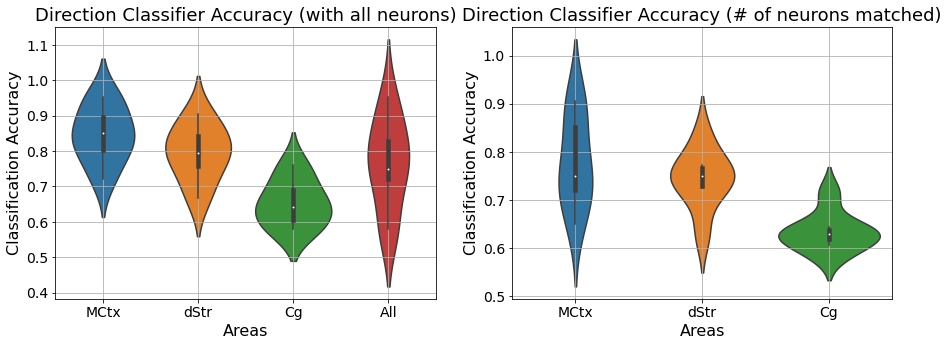

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0] = sns.violinplot(x="variable", y="val_float64", data=df_med_dir, ax=axes[0])
axes[0].set_title("Direction Classifier Accuracy (with all neurons)", fontdict={'fontsize': title_font})
axes[0].set_xlabel("Areas", fontdict={'fontsize': axis_font})
axes[0].set_ylabel("Classification Accuracy", fontdict={'fontsize': axis_font})
axes[0].set_xticklabels(['MCtx', 'dStr', 'Cg', 'All'])
axes[0].tick_params(axis='both', which='major', labelsize=tick_font)
axes[0].grid()

axes[1] = sns.violinplot(x="variable", y="val_float64", data=df_med_rs_dir, ax=axes[1])
axes[1].set_title("Direction Classifier Accuracy (# of neurons matched)", fontdict={'fontsize': title_font})
axes[1].set_xlabel("Areas", fontdict={'fontsize': axis_font})
axes[1].set_ylabel("Classification Accuracy", fontdict={'fontsize': axis_font})
axes[1].set_xticklabels(['MCtx', 'dStr', 'Cg'])
axes[1].tick_params(axis='both', which='major', labelsize=tick_font)
axes[1].grid()

plt.savefig(os.path.join('/Users/parkj/Documents/neural_encoding_trial_types_js2p0', 'Figure', 'direction_classifier_pre_epoch_violin'), dpi=300, format='pdf')

### Classification of the two torques

In [13]:
# Result with resampling to match the number of neurons
rs_trq_idx = ['_rs_trq' in row for row in df_med_melt.variable]  # resample block index
df_med_rs_trq = select_relevant_rows(df_med_melt, rs_trq_idx)

In [14]:
# Result using all neurons
trq_idx = [('_trq' in row) and ('rs' not in row) for row in df_med_melt.variable]  # resample block index
df_med_trq = select_relevant_rows(df_med_melt, trq_idx)

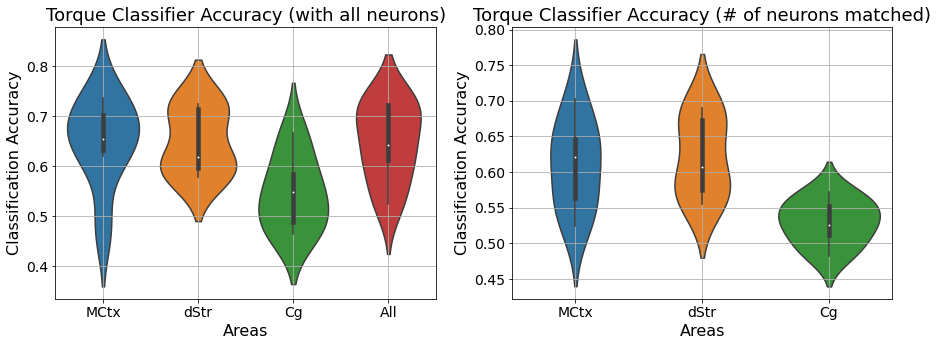

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0] = sns.violinplot(x="variable", y="val_float64", data=df_med_trq, ax=axes[0])
axes[0].set_title("Torque Classifier Accuracy (with all neurons)", fontdict={'fontsize': title_font})
axes[0].set_xlabel("Areas", fontdict={'fontsize': axis_font})
axes[0].set_ylabel("Classification Accuracy", fontdict={'fontsize': axis_font})
axes[0].set_xticklabels(['MCtx', 'dStr', 'Cg', 'All'])
axes[0].tick_params(axis='both', which='major', labelsize=tick_font)
axes[0].grid()

axes[1] = sns.violinplot(x="variable", y="val_float64", data=df_med_rs_trq, ax=axes[1])
axes[1].set_title("Torque Classifier Accuracy (# of neurons matched)", fontdict={'fontsize': title_font})
axes[1].set_xlabel("Areas", fontdict={'fontsize': axis_font})
axes[1].set_ylabel("Classification Accuracy", fontdict={'fontsize': axis_font})
axes[1].set_xticklabels(['MCtx', 'dStr', 'Cg'])
axes[1].tick_params(axis='both', which='major', labelsize=tick_font)
axes[1].grid()

plt.savefig(os.path.join('/Users/parkj/Documents/neural_encoding_trial_types_js2p0', 'Figure', 'torque_classifier_pre_epoch_violin'), dpi=300, format='svg')